In [0]:
import numpy

import pandas as pd

import matplotlib.pyplot as plt

 

import sklearn

from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor


#testing the performance of 3 types of tree-based emsemble regressors
#the numbers of trees are set to 500,without much hyperparameter tunning
#from the plot results，the random forest regressor performed relatively the best




In [3]:
!pip install yfinance --upgrade --no-cache-dir

  Created wheel for yfinance: filename=yfinance-0.1.45-cp36-none-any.whl size=14652 sha256=fb6a3a1acb01f7475b4d073023d6ae6bc68149175ccf147b466b4140b9cab0c5
  Stored in directory: /tmp/pip-ephem-wheel-cache-07s9ia0l/wheels/0c/d1/df/aa9a7744a4ac353cc9a1f2c3aaea7c1f457fc49de4286f2d88
Successfully built yfinance


In [4]:
import numpy as np
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
%cd "/content/drive/My Drive"


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive


In [36]:
#read AMZN data from yahoo 
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
yf.pdr_override()
df_full = pdr.get_data_yahoo("AMZN", start="2017-01-01").reset_index()
df_full.to_csv('/AMZN.csv',index=False)
df_full.head()

[*********************100%***********************]  1 of 1 downloaded


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,757.919983,758.760010,747.700012,753.669983,753.669983,3521100
1,2017-01-04,758.390015,759.679993,754.200012,757.179993,757.179993,2510500
2,2017-01-05,761.549988,782.400024,760.260010,780.450012,780.450012,5830100
3,2017-01-06,782.359985,799.440002,778.479980,795.989990,795.989990,5986200
4,2017-01-09,798.000000,801.770020,791.770020,796.919983,796.919983,3446100


In [0]:
df_full=pd.read_csv('/AMZN.csv')

In [38]:
df_full.set_index('Date',inplace=True)
df_full.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,757.919983,758.760010,747.700012,753.669983,753.669983,3521100
2017-01-04,758.390015,759.679993,754.200012,757.179993,757.179993,2510500
2017-01-05,761.549988,782.400024,760.260010,780.450012,780.450012,5830100
2017-01-06,782.359985,799.440002,778.479980,795.989990,795.989990,5986200
2017-01-09,798.000000,801.770020,791.770020,796.919983,796.919983,3446100


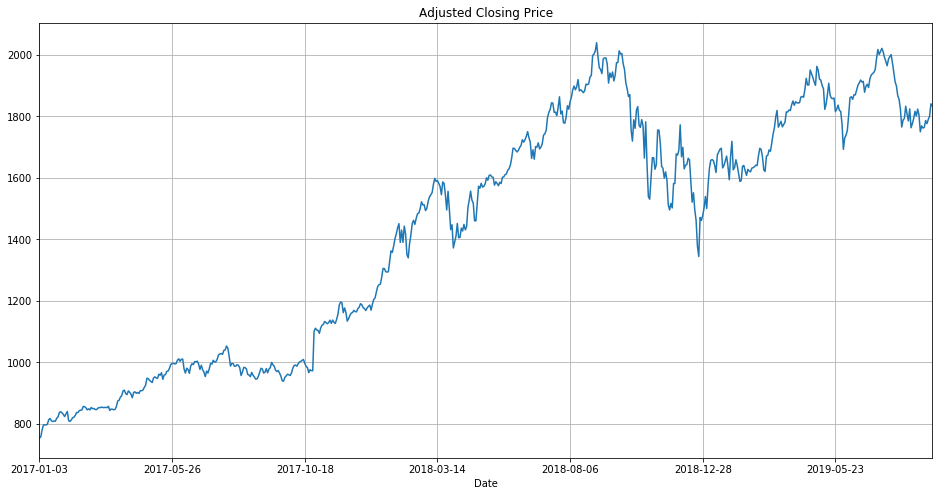

In [74]:
#visualize the curve of Adjusted closing price
df_full['Adj Close'].plot(label='AMZN',figsize=(16,8),title='Adjusted Closing Price',grid=True)

In [0]:


window_size = 32 # Allow us to look at 32 days into the past
# Prepare the data so that we have 32 day windows and predict what the next day should be

# Get indices of access for the data
num_samples = len(df_full) - window_size
indices = np.arange(num_samples).astype(np.int)[:,None] + np.arange(window_size + 1).astype(np.int)




In [0]:
data = df_full['Adj Close'].values[indices] # Create the 2D matrix of training samples

In [0]:
X = data[:,:-1] # Each row represents 32 days in the past
y = data[:,-1] # Each output value represents the 33rd day



In [0]:
#split the data into 0.8 and 0.2 as training set and testing set
split_fraction = 0.8
ind_split = int(split_fraction * num_samples)
X_train = X[:ind_split]
y_train = y[:ind_split]
X_test = X[ind_split:]
y_test = y[ind_split:]


In [44]:
#train a decision tree regressor
tr_regressor=DecisionTreeRegressor(random_state=0)

tr_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [0]:
#make prediction with dt regressor
pred_train_tree=tr_regressor.predict(X_train)
pred_test_tree=tr_regressor.predict(X_test)

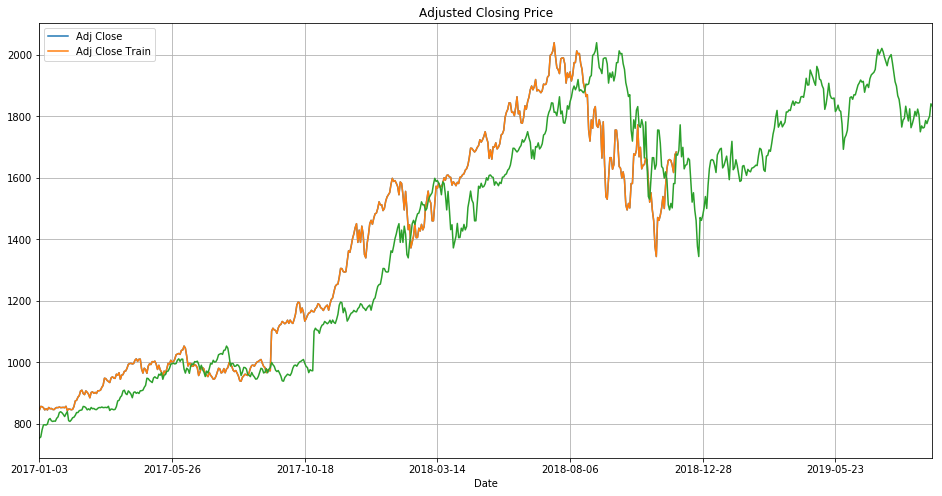

In [56]:
#plot the dt result with training data
df_tr = df_full.copy()
df_tr.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_tr = df_tr.iloc[window_size:ind_split] # Past 32 days we don't know yet
df_tr['Adj Close Train'] = pred_train_tree[:-window_size]
df_tr.plot(label='AMZN', figsize=(16,8), title='Adjusted Closing Price', grid=True)


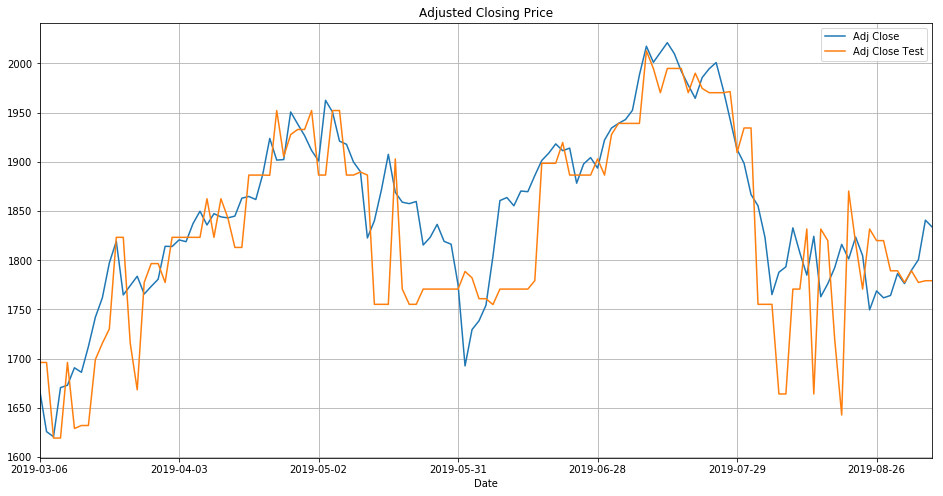

In [54]:
#plot the dt result with testing data

df_tr = df_full.copy()
df_tr.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_tr = df_tr.iloc[ind_split+window_size:] # Past 32 days we don't know yet
df_tr['Adj Close Test'] = pred_test_tree
df_tr.plot(label='AMZN', figsize=(16,8), title='Adjusted Closing Price', grid=True)


In [64]:
#random forest
rf_regressor= RandomForestRegressor(max_depth=3, random_state=0,n_estimators=500)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [0]:
#make prediction with RF regressor
pred_train_rf = rf_regressor.predict(X_train)
pred_test_rf = rf_regressor.predict(X_test)

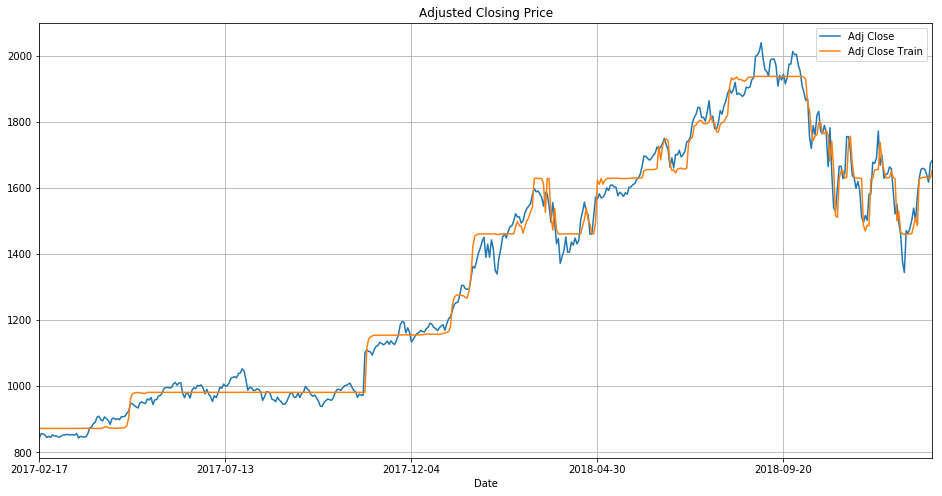

In [66]:
#plot the rf result with training data

df_rf= df_full.copy()
df_rf.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_rf = df_rf.iloc[window_size:ind_split] # Past 32 days we don't know yet
df_rf['Adj Close Train'] = pred_train_rf[:-window_size]
df_rf.plot(label='AMZN', figsize=(16,8), title='Adjusted Closing Price', grid=True)


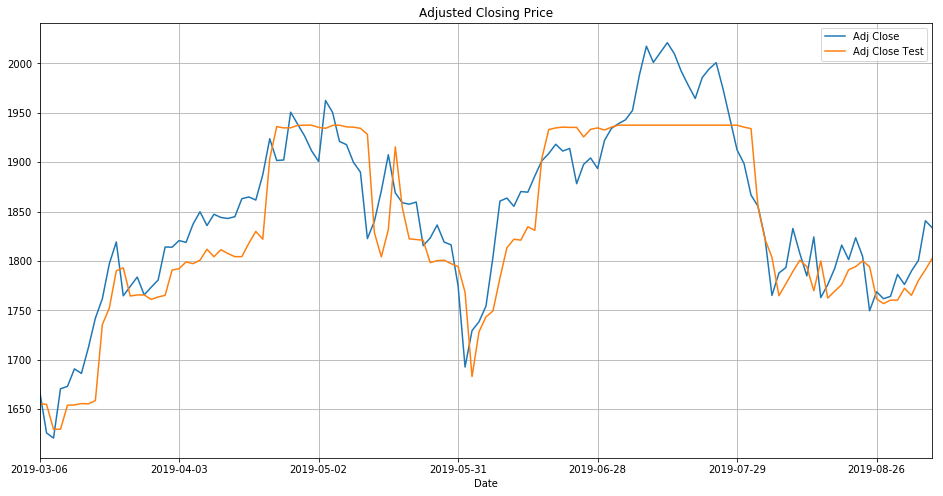

In [67]:
#plot the rf result with testing data

df_rf = df_full.copy()
df_rf.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_rf = df_rf.iloc[ind_split+window_size:] # Past 32 days we don't know yet
df_rf['Adj Close Test'] = pred_test_rf
df_rf.plot(label='AMZN', figsize=(16,8), title='Adjusted Closing Price', grid=True)
#df_full['Adj Close'].plot(label='AMZN',figsize=(16,8),title='Adjusted Closing Price',grid=True)

In [69]:
#train a extra tree regressor
et_regressor=ExtraTreesRegressor(max_depth=3, random_state=0,n_estimators=500)

et_regressor.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=3,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
                    oob_score=False, random_state=0, verbose=0,
                    warm_start=False)

In [0]:
#make prediction with ET regressor
pred_train_et = et_regressor.predict(X_train)
pred_test_et = et_regressor.predict(X_test)

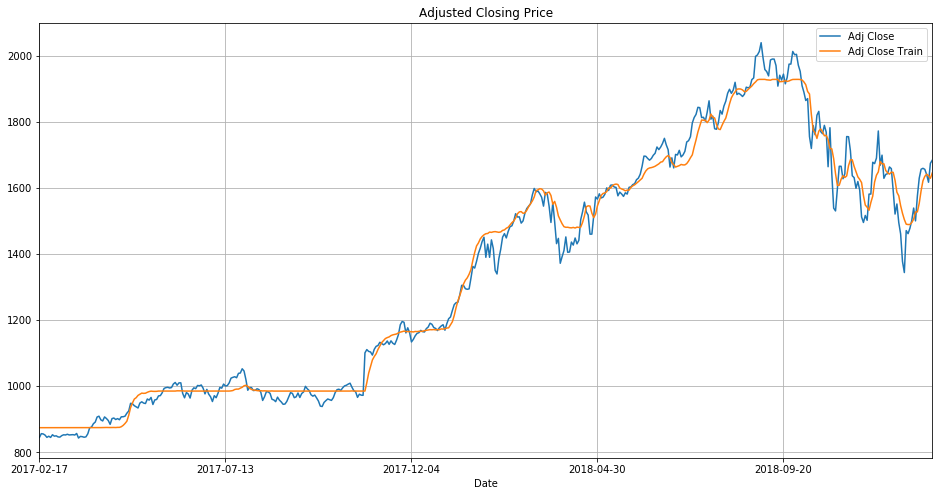

In [71]:
#plot the ET result with training data

df_et= df_full.copy()
df_et.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_et = df_et.iloc[window_size:ind_split] # Past 32 days we don't know yet
df_et['Adj Close Train'] = pred_train_et[:-window_size]
df_et.plot(label='AMZN', figsize=(16,8), title='Adjusted Closing Price', grid=True)


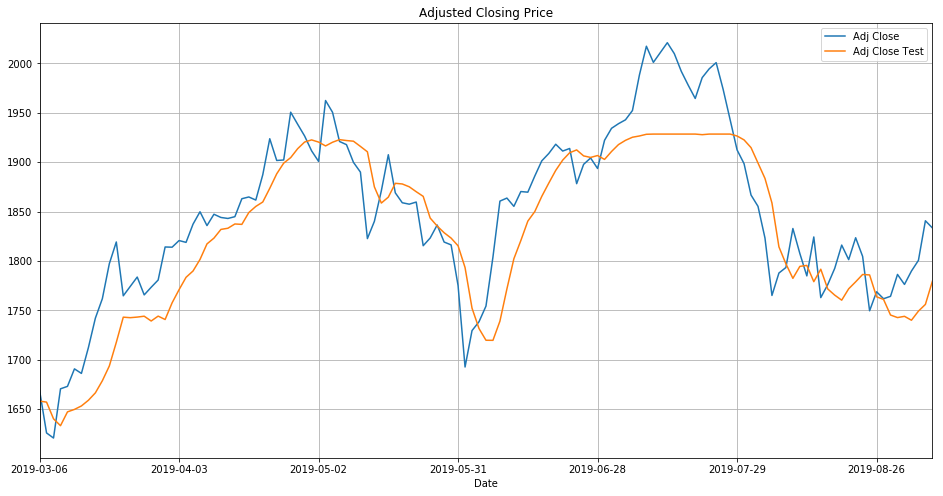

In [72]:
#plot the ET result with testing data

df_et = df_full.copy()
df_et.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_et = df_et.iloc[ind_split+window_size:] # Past 32 days we don't know yet
df_et['Adj Close Test'] = pred_test_et
df_et.plot(label='AMZN', figsize=(16,8), title='Adjusted Closing Price', grid=True)
